<a href="https://colab.research.google.com/github/Sanjana060101/ML-/blob/main/3_1_logistic_regression_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

---
For eg:- y = 0 or 1 , so the logistic regression curve tries to find(predict) the probability of outcome being 1 ( eg. 30% , 70% , etc ) , to predict the value of Y , we decide a line eg at 50% , if the predicted probability is lower than that , we predict Y (y^)=0 , otherwise y^ = 1


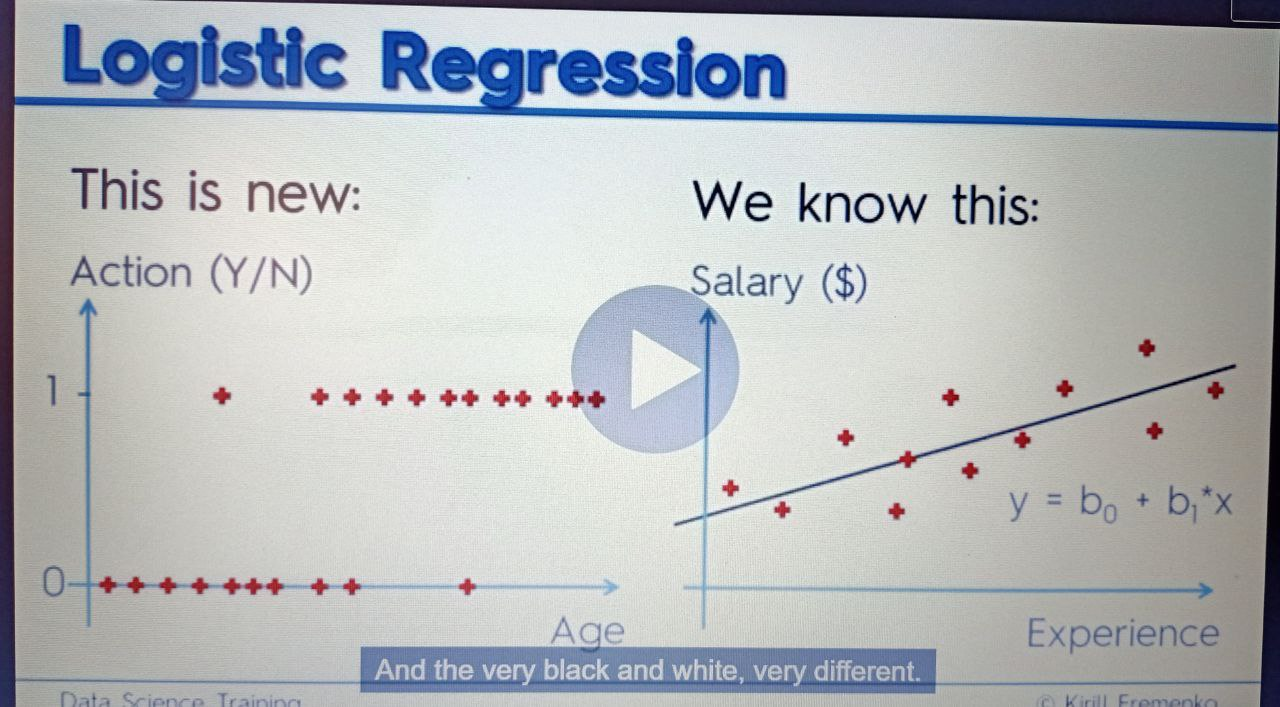

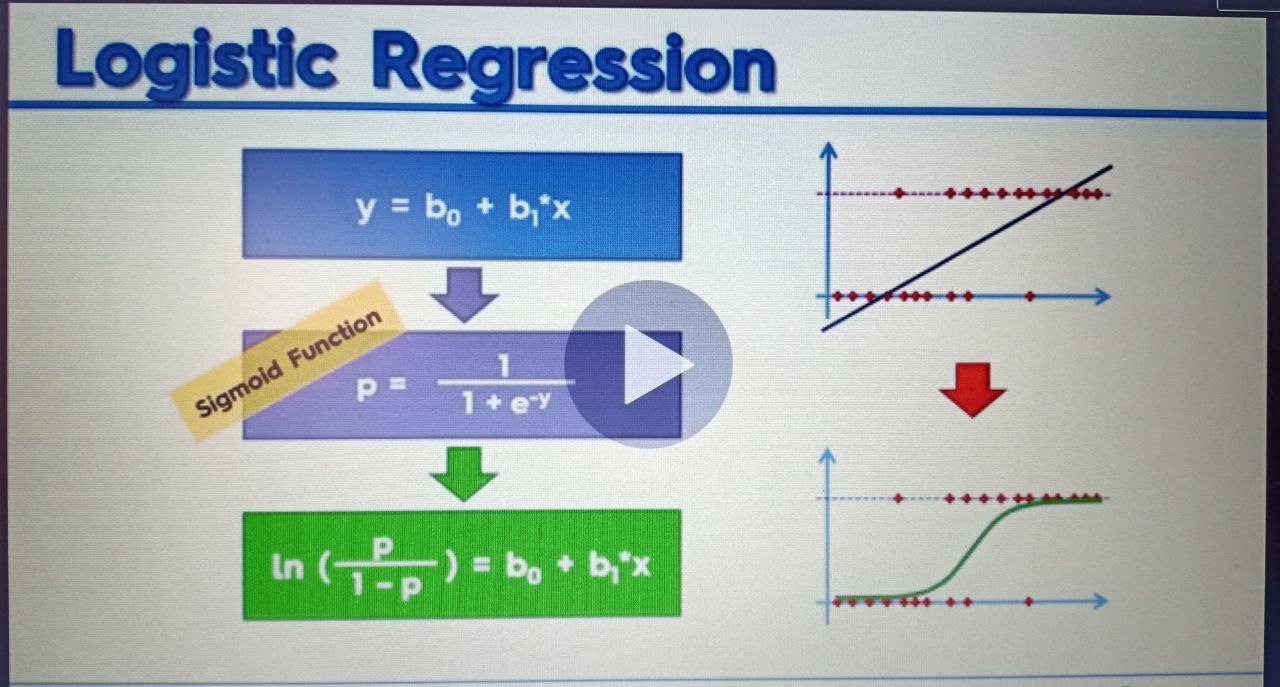

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.25 , random_state = 0)
print(x_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [ ]:
print(x_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)   # we can also select the whole x_train by using ranges for rows and columns , but not needed 
x_test = sc.transform(x_test)
print(x_train)

[[ 0.58 -0.89]
 [-0.61  1.46]
 [-0.01 -0.57]
 [-0.61  1.9 ]
 [ 1.37 -1.41]
 [ 1.47  1.  ]
 [ 0.09 -0.8 ]
 [-0.01 -0.25]
 [-0.21 -0.57]
 [-0.21 -0.19]
 [-0.31 -1.29]
 [-0.31 -0.57]
 [ 0.38  0.1 ]
 [ 0.88 -0.6 ]
 [ 2.07 -1.18]
 [ 1.08 -0.13]
 [ 0.68  1.78]
 [-0.71  0.56]
 [ 0.78  0.36]
 [ 0.88 -0.54]
 [-1.2  -1.58]
 [ 2.17  0.94]
 [-0.01  1.23]
 [ 0.19  1.08]
 [ 0.38 -0.48]
 [-0.31 -0.31]
 [ 0.98 -0.83]
 [ 0.98  1.87]
 [-0.01  1.26]
 [-0.9   2.27]
 [-1.2  -1.58]
 [ 2.17 -0.8 ]
 [-1.4  -1.47]
 [ 0.38  2.3 ]
 [ 0.78  0.77]
 [-1.   -0.31]
 [ 0.09  0.77]
 [-1.    0.56]
 [ 0.28  0.07]
 [ 0.68 -1.26]
 [-0.51 -0.02]
 [-1.8   0.36]
 [-0.71  0.13]
 [ 0.38  0.3 ]
 [-0.31  0.07]
 [-0.51  2.3 ]
 [ 0.19  0.04]
 [ 1.27  2.22]
 [ 0.78  0.27]
 [-0.31  0.16]
 [-0.01 -0.54]
 [-0.21  0.16]
 [-0.11  0.24]
 [-0.01 -0.25]
 [ 2.17  1.11]
 [-1.8   0.36]
 [ 1.87  0.13]
 [ 0.38 -0.13]
 [-1.2   0.3 ]
 [ 0.78  1.37]
 [-0.31 -0.25]
 [-1.7  -0.05]
 [-1.   -0.74]
 [ 0.28  0.5 ]
 [-0.11 -1.06]
 [-1.1   0.59]
 [ 0.09 -0

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression # most famous parameter is C , inverse of regularization strength , smaller C , more 
# regularization , more protection from overfitting 
classifier = LogisticRegression(random_state = 0) # this line builds the logistic regression model
classifier.fit(x_train , y_train) # Now , the model is trained 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting a new result

In [ ]:
#print(classifier.predict(sc.transform([[30,87000]])))
print(classifier.predict([x_test[1,:]]))  # don't know why we had to write this x_test wala in []


[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(x_test)
np.set_printoptions(precision = 2)  
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # printing the vectors altogether 

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix  # a classification matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)


[[65  3]
 [ 8 24]]


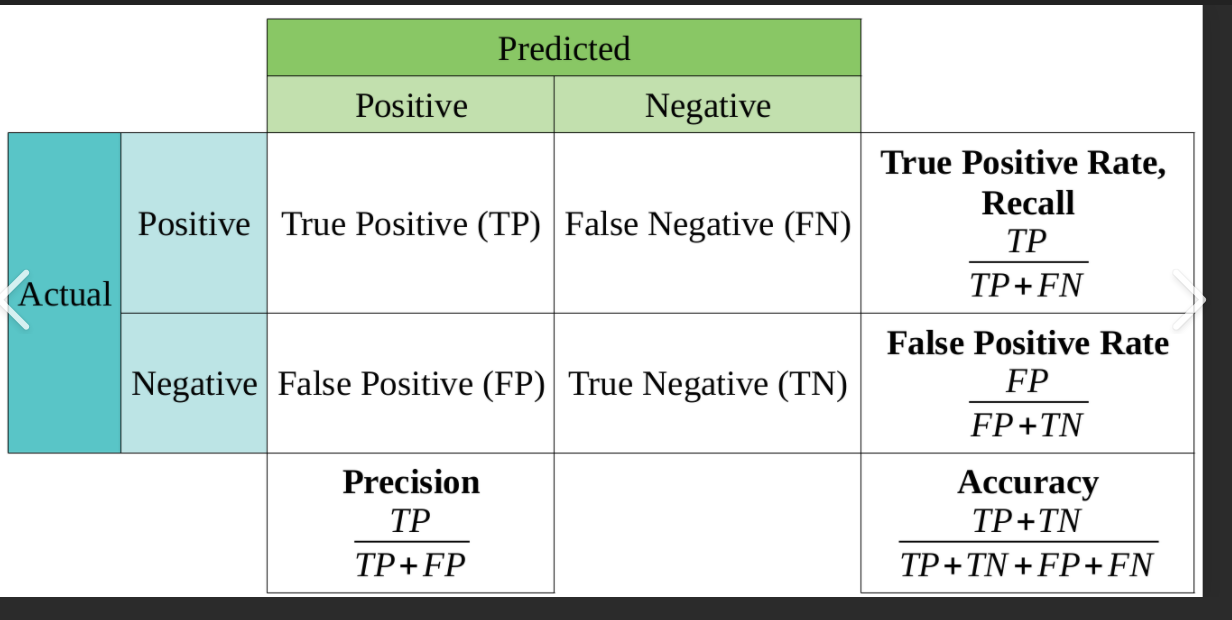

In [ ]:
from sklearn.metrics import accuracy_score   # computes the accuracy of classification score 
ac = accuracy_score(y_test , y_pred)  # accuracy is the rate of correct predictions , no need to print it as it automatically returns accuracy
# acuuracy is the right matrix to use for finding accuracy in classification model 
#print(ac)

0.89


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


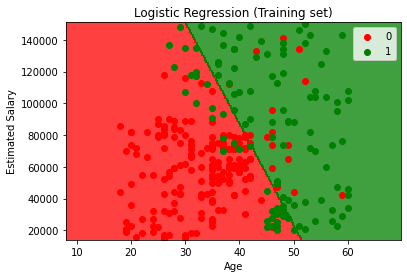

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Prediction boundary is the boundary between these two prediction regions(red and green) , it is where our classifer 
# seperates the two classes , the class 0 and the class 1 
# Prediction curve for the logistic regression model is actually a straight line becuase logistic rgression model is a linear classifier 
# For any linear classsifier the prediction boundary or prediction curve will always be a straight line in 2d , in 3d , it'll be a straight plane

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


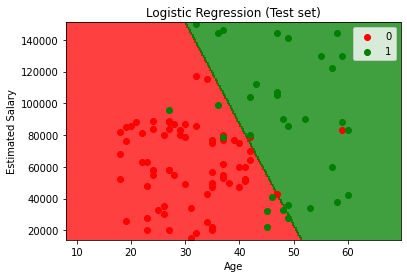

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# We have to minimise the errors we are getting here and for them we will need the non-linear classifiers 
# so that our decision boundary will not be a straight line and some other curse to get better predictions 


https://www.udemy.com/course/logistic-regression-cancer-detection-case-study/?referralCode=7E62BC258B645C95D9F5 

---

https://www.superdatascience.com/blogs/the-ultimate-guide-to-regression-classification